In [42]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
# Load historical stock data (replace 'stock_data.csv' with your data sour
url = 'TSLA.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [44]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

<Axes: xlabel='Date', ylabel='Close'>

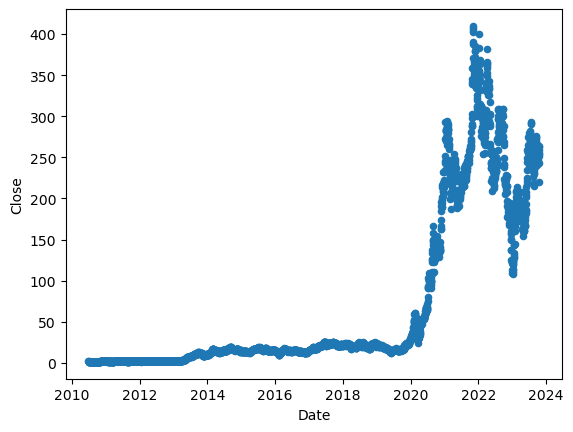

In [45]:
df.plot.scatter(x = 'Date', y = 'Close')

In [46]:
df['Date_conv'] = df['Date'].map(datetime.toordinal)

In [47]:
old = (df['Date'] < '2020-01-01')
df.drop(df[old == True].index, inplace=True)

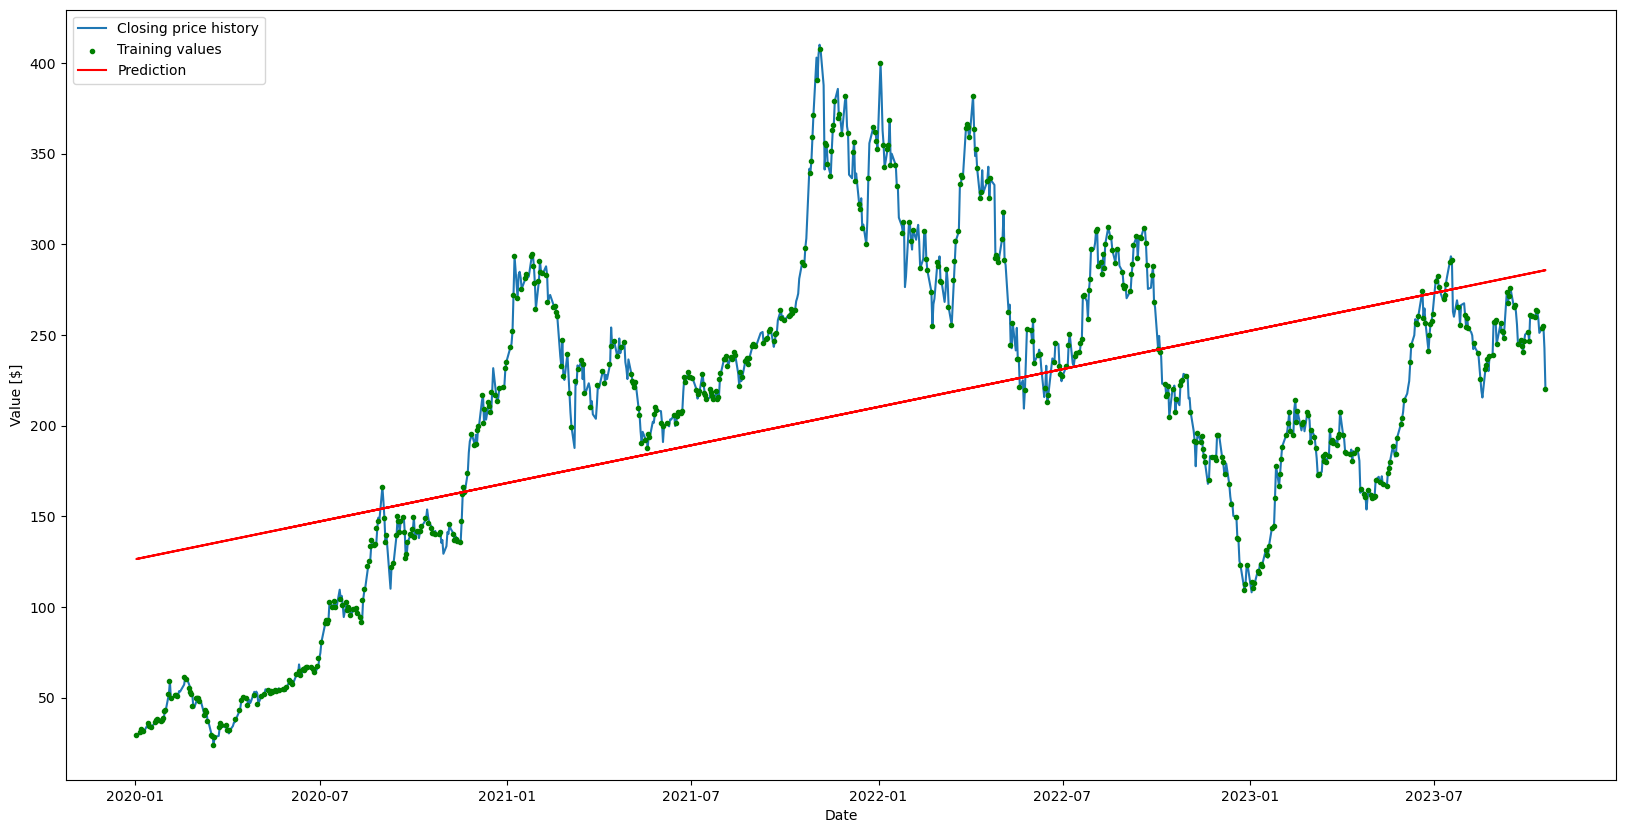

In [48]:
x = df["Date_conv"].values
y = df["Close"].values


# Reshape array from 1D to 2D
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)

fig=plt.figure(figsize=(20, 10))

# Creating two subplots on the same position 111
# Plot two shares the same y-axis as plot1 and the frame is hidden
plot1 = fig.add_subplot(111)
plot2 = fig.add_subplot(111, sharey=plot1, frame_on=False)

# Plot historical data
plot1.plot(df['Date'],df['Close'], label="Closing price history")
plot1.set_xlabel("Date")
plot1.set_ylabel("Value [$]")

# Plot training data
# Hide the values for x-axis because date in integer form is not easily readable by a person
# Hide the values for y-axis because it is the same axis as plot 1
plot2.scatter(x_train, y_train, color="green", marker=".", label="Training values")
plot2.axes.get_xaxis().set_visible(False)
plot2.axes.get_yaxis().set_visible(False)
plot2.plot(x_train, y_pred, color='red', label="Prediction")

# Combining labels and handles from both subplots
handle1, label1 = plot1.get_legend_handles_labels()
handle2, label2 = plot2.get_legend_handles_labels()
plot1.legend(handles=(handle1 + handle2), labels=(label1 + label2), loc="upper left")

plt.show()

In [49]:
def predictPrice(date):
    date = datetime.strptime(date, "%Y-%m-%d")
    date_ordinal = date.toordinal()
    date_index = df.Date[df.Date == date].index.tolist()[0]
    
    prediction = lr.predict([[date_ordinal]])[0]
    real = df.Close[date_index]
    difference = prediction / real * 100
    print(f"Predicted price on {date} is: ${prediction:.2f}")
    print(f"Real value on {date} is: ${real:.2f}")
    print(f"Prediction is {difference:.2f}% of real value")
    print("MSE = " + str(mean_squared_error(y_train, y_pred)))

In [50]:
predictPrice("2023-09-21")

Predicted price on 2023-09-21 00:00:00 is: $282.46
Real value on 2023-09-21 00:00:00 is: $255.70
Prediction is 110.47% of real value
MSE = 5466.409897574386
